In [1]:
#Libraries import

In [2]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd


file_path = "../datasets/germ_watch_data/germwatch_covid_hospitalizations_20241029_140153.csv"
covid_df = pd.read_csv(file_path)

covid_df_filtered = covid_df[["EMPI","COLLECTED_DTS","ORGANIZATION_NM", "CHILDRENS_HOSPITAL"]]
covid_df_filtered.rename(columns={"COLLECTED_DTS": "DATE"}, inplace=True)
covid_df_filtered["DATE"] = pd.to_datetime(covid_df_filtered["DATE"])
covid_df_filtered["ADMISSIONS"] = covid_df_filtered.groupby(["DATE", "ORGANIZATION_NM", "CHILDRENS_HOSPITAL"])["EMPI"].transform('count')
covid_df_filtered.set_index('DATE',inplace=True)

covid_df_filtered.head()

/Users/shivaharigundeti/anaconda3/envs/time-series-pred/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/n7/gd3v0tws03l5q6m7qtmsnqjm0000gn/T/ipykernel_85575/2239246597.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_filtered.rename(columns={"COLLECTED_DTS": "DATE"}, inplace=True)
/var/folders/n7/gd3v0tws03l5q6m7qtmsnqjm0000gn/T/ipykernel_85575/2239246597.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,EMPI,ORGANIZATION_NM,CHILDRENS_HOSPITAL,ADMISSIONS
DATE,,,,
2020-04-07 09:22:00,586302575,Primary Childrens Hospital,1,1
2020-05-17 02:44:00,549456959,Primary Childrens Hospital,1,1
2020-05-23 13:02:00,572159150,Primary Childrens Hospital,1,1
2020-06-10 22:46:00,550498352,Primary Childrens Hospital,1,1
2020-07-11 20:44:00,549649394,Primary Childrens Hospital,1,1


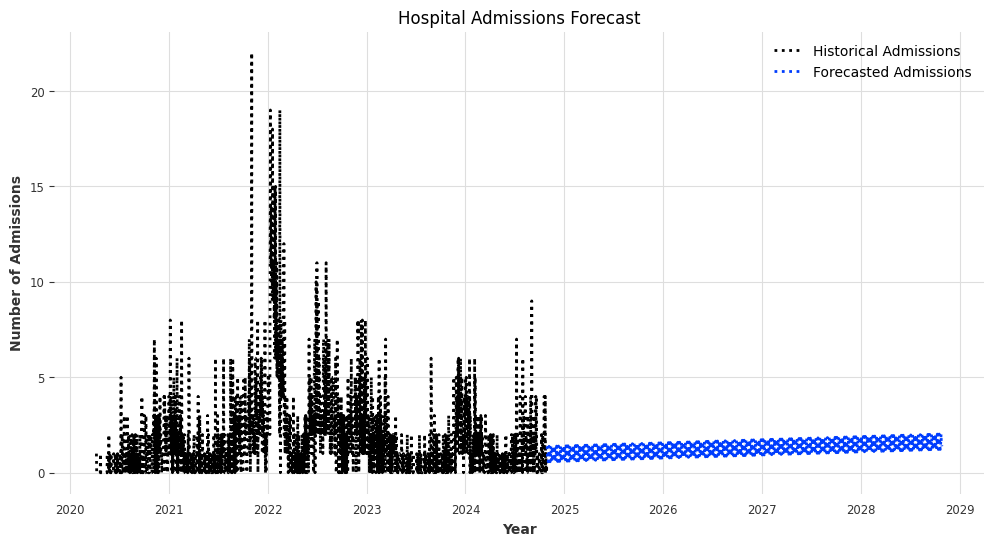

In [3]:

df_daily = covid_df_filtered.resample("D").sum().fillna(0)
series = TimeSeries.from_dataframe(df_daily, value_cols="ADMISSIONS")

model = ExponentialSmoothing()
model.fit(series)
forecast = model.predict((2028 - df_daily.index.year.max()) * 365)

# Plot the data and forecast
plt.figure(figsize=(12, 6))
series.plot(label="Historical Admissions",linestyle="dotted")
forecast.plot(label="Forecasted Admissions", linestyle="dotted")
plt.title("Hospital Admissions Forecast")
plt.xlabel("Year")
plt.ylabel("Number of Admissions")
plt.legend()
plt.show()

/var/folders/n7/gd3v0tws03l5q6m7qtmsnqjm0000gn/T/ipykernel_85575/1417552436.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = covid_df_filtered.resample("M").sum().fillna(0)


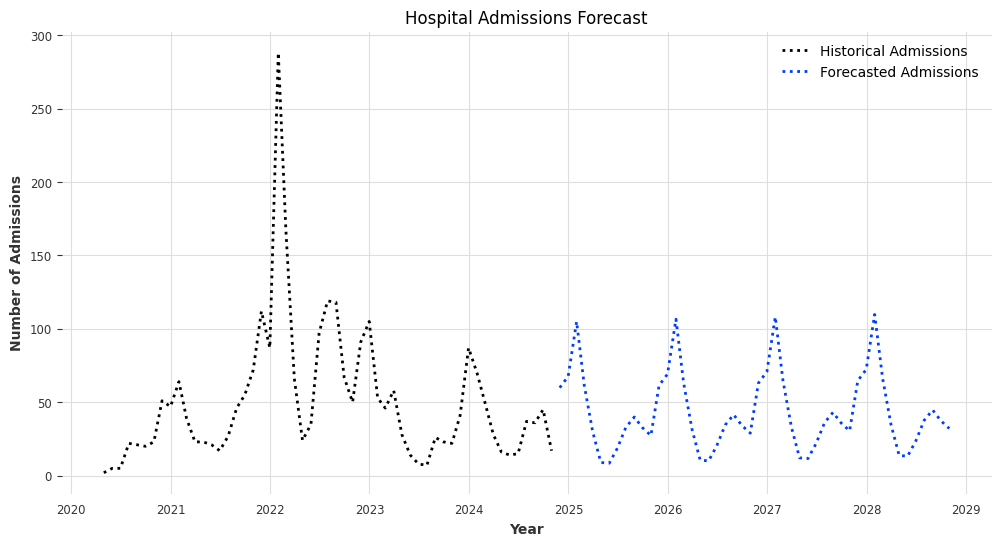

In [4]:
df_monthly = covid_df_filtered.resample("M").sum().fillna(0)

series = TimeSeries.from_dataframe(df_monthly, value_cols="ADMISSIONS")

model = ExponentialSmoothing()
model.fit(series)
forecast = model.predict((2028 - df_monthly.index.year.max()) * 12)

# Plot the data and forecast
plt.figure(figsize=(12, 6))
series.plot(label="Historical Admissions",linestyle="dotted")
forecast.plot(label="Forecasted Admissions", linestyle="dotted")
plt.title("Hospital Admissions Forecast")
plt.xlabel("Year")
plt.ylabel("Number of Admissions")
plt.legend()
plt.show()

In [5]:
covid_df_filtered.head()

,EMPI,ORGANIZATION_NM,CHILDRENS_HOSPITAL,ADMISSIONS
DATE,,,,
2020-04-07 09:22:00,586302575,Primary Childrens Hospital,1,1
2020-05-17 02:44:00,549456959,Primary Childrens Hospital,1,1
2020-05-23 13:02:00,572159150,Primary Childrens Hospital,1,1
2020-06-10 22:46:00,550498352,Primary Childrens Hospital,1,1
2020-07-11 20:44:00,549649394,Primary Childrens Hospital,1,1


In [9]:
monthly_admissions = (
    covid_df_filtered
    .groupby([pd.Grouper(freq='M'), 'ORGANIZATION_NM', 'CHILDRENS_HOSPITAL'])
    .agg({'ADMISSIONS': 'sum'})
    .reset_index()
)

monthly_admissions

/var/folders/n7/gd3v0tws03l5q6m7qtmsnqjm0000gn/T/ipykernel_85575/3733511788.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,DATE,ORGANIZATION_NM,CHILDRENS_HOSPITAL,ADMISSIONS
0,2020-04-30,Primary Childrens Hospital,1,2
1,2020-05-31,Primary Childrens Hospital,1,4
2,2020-05-31,St George Regional Hospital,0,1
3,2020-06-30,Intermountain Medical Center,0,1
4,2020-06-30,McKay-Dee Behavioral Health,0,1
...,...,...,...,...
362,2024-09-30,Primary Childrens Hospital Lehi - Miller Campus,1,6
363,2024-09-30,St George Regional Hospital,0,1
364,2024-10-31,Primary Childrens Hospital,1,12
365,2024-10-31,Primary Childrens Hospital Lehi - Miller Campus,1,4


In [7]:
import plotly.express as px

fig = px.line(
    monthly_admissions,
    x='DATE',
    y='ADMISSIONS',
    color='ORGANIZATION_NM',
    line_group='CHILDRENS_HOSPITAL',
    markers=True,
    title="Monthly Admissions"
)
fig.update_xaxes(type='category')  # To keep month formatting readable
fig.show(renderer="vscode")